In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load the data
df = pd.read_csv("ready_to_coock_data.csv")

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the data
df = pd.read_csv("ready_to_coock_data.csv")

# Drop rows with NaN values in 'preprocess_data' column
df = df.dropna(subset=['preprocess_data'])

# Convert 'preprocess_data' column to strings
df['preprocess_data'] = df['preprocess_data'].astype(str)

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['preprocess_data'])
sequences = tokenizer.texts_to_sequences(df['preprocess_data'])
max_word_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_word_length, padding='post', truncating='post')

# Split the data into training and testing sets
x_train_padded, x_test_padded, y_train, y_test = train_test_split(
    padded_sequences,
    df['target'].values,
    test_size=0.2,
    random_state=42
)

# Build the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_word_length))
model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks (optional)
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='min', restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(x_train_padded, y_train, epochs=20, batch_size=32, validation_split=0.2,
                    callbacks=[checkpoint, early_stopping])

# Evaluate the model on the testing set
eval_loss, eval_acc = model.evaluate(x_test_padded, y_test)
print(f'\nEvaluation accuracy on testing set: {eval_acc * 100:.2f}%')


Epoch 1/20
104/104 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8701
Epoch 1: val_loss improved from inf to 0.38711, saving model to best_lstm_model.h5


f:\End_To_End_project\Ham_Spam_Classifier(ETE)\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


104/104 [==============================] - 38s 248ms/step - loss: 0.3963 - accuracy: 0.8701 - val_loss: 0.3871 - val_accuracy: 0.8705
Epoch 2/20
104/104 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.8734
Epoch 2: val_loss improved from 0.38711 to 0.38586, saving model to best_lstm_model.h5
104/104 [==============================] - 29s 273ms/step - loss: 0.3820 - accuracy: 0.8734 - val_loss: 0.3859 - val_accuracy: 0.8705
Epoch 3/20
104/104 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.8734
Epoch 3: val_loss did not improve from 0.38586
104/104 [==============================] - 29s 275ms/step - loss: 0.3808 - accuracy: 0.8734 - val_loss: 0.3883 - val_accuracy: 0.8705
Epoch 4/20
104/104 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8734
Epoch 4: val_loss did not improve from 0.38586
104/104 [==============================] - 30s 290ms/step - loss: 0.3811 - accuracy: 0.8734 - val_loss: 0.3862 - val_accuracy: 0.

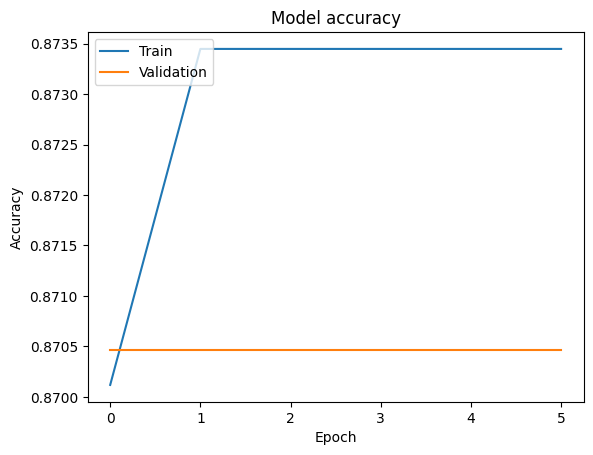

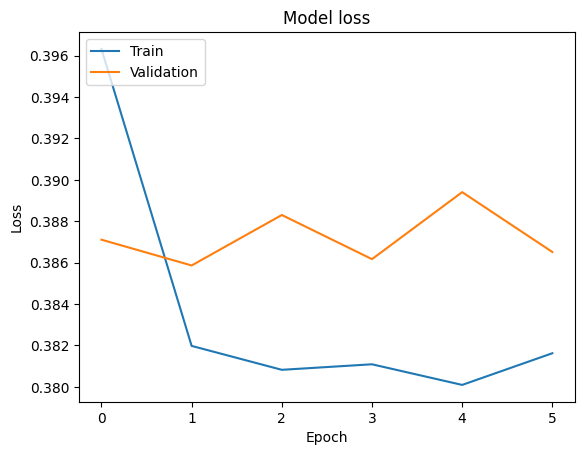

In [40]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
